In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
from scipy.stats import linregress

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [3]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

In [4]:
# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0
427 427


In [5]:
merged_renamed.loc[merged_renamed["Country Name"] == "United States"]

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
403,United States,2017,6.991759,10.905420,0.921003,68.400002,0.868497,0.194489,0.681191,0.826555,0.692602,1.552104,1.880688,0.268986,North America
404,United States,2018,6.882685,10.927395,0.903856,68.300003,0.824607,0.113378,0.709928,0.815383,0.758395,1.482865,2.119374,0.307928,North America
405,United States,2019,6.943701,10.944225,0.916691,68.199997,0.836139,0.141645,0.706716,0.814985,NaN,NaN,1.789670,0.257740,North America


#### Filter data set to only include countries that have data for all 3 years

In [6]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if length matches length of countries lists
Final_df["Country Name"].nunique()


129
153


129

#### Final Data sets

In [7]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
67,Bolivia,2015,5.834329,8.770963,0.828706,62.700001,0.883625,-0.021084,0.862374,0.785768,-0.136578,-0.843813,1.857556,0.318384,0.467,Latin America & Caribbean
72,Botswana,2015,3.761965,9.658858,0.815656,56.799999,0.857169,-0.119637,0.860293,0.746204,0.741217,0.597275,2.291609,0.609152,0.533,Sub-Saharan Africa
79,Brazil,2015,6.546897,9.602870,0.906693,65.800003,0.798935,-0.022317,0.771339,0.755194,0.063697,-0.230077,2.257859,0.344875,0.513,Latin America & Caribbean
98,Chile,2015,6.532750,10.010426,0.827142,69.599998,0.768881,0.036379,0.811511,0.803025,0.718964,1.263847,1.938147,0.296682,0.477,Latin America & Caribbean
107,Colombia,2015,6.387572,9.481480,0.889900,66.800003,0.790898,-0.102062,0.842899,0.839295,-0.532610,-0.034323,2.246151,0.351644,0.511,Latin America & Caribbean


In [8]:
#Data set with the countries that have data for all 3 years 
len(Final_df)

387

In [38]:
gini_index_2015 = gini_index_2015.rename(columns={"Life Ladder" : "Happiness Score"})

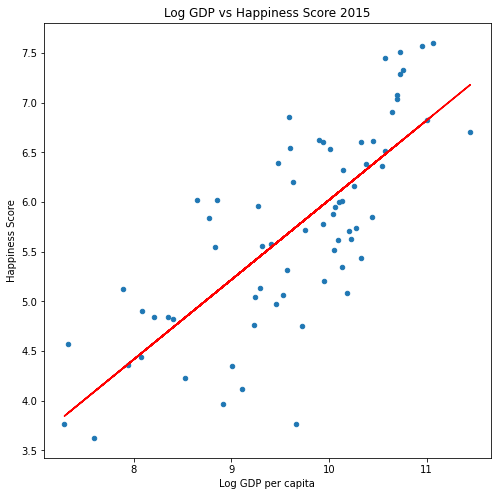

The r-value is 0.7619276931775728
The p-value is 1.8599268883551808e-14


In [39]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="Log GDP vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gdp = gini_index_2015.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept

plt.plot(gdp,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print("The r-value is " + str(rvalue))
print("The p-value is " + str(pvalue))

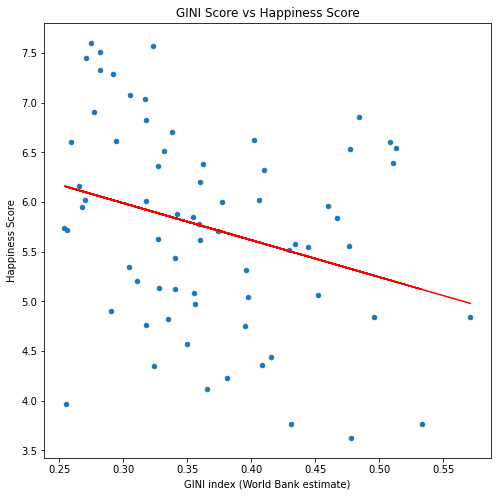

The r-value is -0.29170169576761745
The p-value is 0.014279697472189481


In [40]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="GINI index (World Bank estimate)", y="Happiness Score", grid=False, figsize=(8,8),
              title="GINI Score vs Happiness Score")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gini = gini_index_2015.iloc[:, 14]
correlation = st.pearsonr(gini, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gini, happiness)
regress_values = gini * slope + intercept

plt.plot(gini,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print("The r-value is " + str(rvalue))
print("The p-value is " + str(pvalue))

In [43]:
#Move gini index into a list
gini_values = gini_index_2015["GINI index (World Bank estimate)"]

#sort gini index
gini_values.sort_values()


550    0.254
628    0.255
46     0.256
145    0.259
542    0.265
329    0.268
410    0.270
210    0.271
448    0.275
56     0.277
437    0.282
154    0.282
342    0.290
578    0.292
393    0.294
272    0.304
35     0.305
130    0.311
238    0.317
303    0.318
501    0.318
180    0.318
583    0.323
22     0.324
201    0.327
219    0.327
605    0.328
638    0.332
453    0.335
375    0.338
586    0.340
138    0.340
354    0.342
202    0.350
317    0.354
509    0.355
382    0.356
517    0.359
598    0.360
248    0.360
565    0.362
230    0.365
368    0.374
527    0.377
428    0.381
292    0.395
534    0.396
287    0.397
651    0.402
190    0.406
332    0.408
389    0.410
318    0.415
614    0.429
603    0.431
487    0.434
493    0.444
164    0.452
175    0.460
67     0.467
475    0.476
98     0.477
58     0.478
121    0.484
262    0.496
463    0.508
107    0.511
79     0.513
72     0.533
661    0.571
Name: GINI index (World Bank estimate), dtype: float64

In [44]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = gini_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 0.3125
The upper quartile of temperatures is: 0.41374999999999995
The interquartile range of temperatures is: 0.10124999999999995
The the median of temperatures is: 0.3545 
Values below 0.16062500000000007 could be outliers.
Values above 0.5656249999999998 could be outliers.


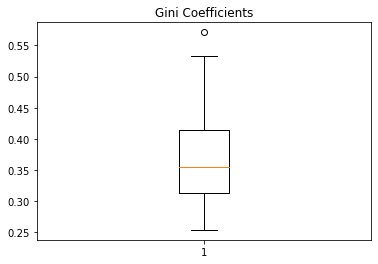

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
props = dict(markerfacecolor = 'red')
plt.boxplot(gini_values)
plt.title("Gini Coefficients")
plt.show()

In [46]:
equal = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]<0.3125), :]
equal.count()

Country name                                         18
year                                                 18
Happiness Score                                      18
Log GDP per capita                                   18
Social support                                       18
Healthy life expectancy at birth                     18
Freedom to make life choices                         18
Generosity                                           18
Perceptions of corruption                            18
Positive affect                                      18
Democratic Quality                                   18
Delivery Quality                                     18
Standard deviation of ladder by country-year         18
Standard deviation/Mean of ladder by country-year    18
GINI index (World Bank estimate)                     18
Region                                               18
dtype: int64

In [47]:
unequal = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]>0.41374999999999995), :]
unequal.count()

Country name                                         18
year                                                 18
Happiness Score                                      18
Log GDP per capita                                   18
Social support                                       18
Healthy life expectancy at birth                     18
Freedom to make life choices                         18
Generosity                                           18
Perceptions of corruption                            18
Positive affect                                      18
Democratic Quality                                   18
Delivery Quality                                     18
Standard deviation of ladder by country-year         18
Standard deviation/Mean of ladder by country-year    18
GINI index (World Bank estimate)                     18
Region                                               18
dtype: int64

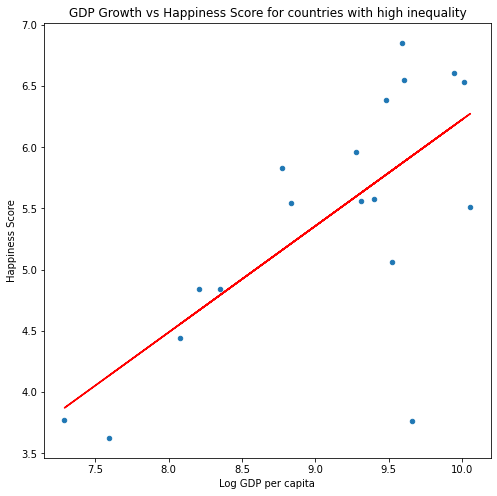

0.7069238390030299
0.0010365237749207787


In [48]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
unequal.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="GDP Growth vs Happiness Score for countries with high inequality")

#Calculate the correlation coefficient
happiness = unequal.iloc[:, 2]
gdp = unequal.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept

plt.plot(gdp,regress_values,"r-")


# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)
print(pvalue)

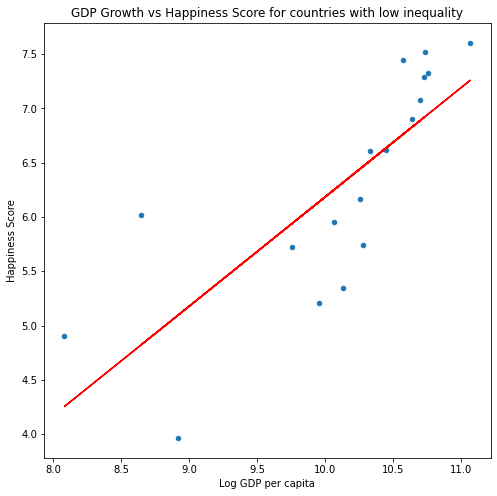

0.7843216387055078
0.00011661863136819774


In [49]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
equal.plot(kind="scatter", x="Log GDP per capita", y="Happiness Score", grid=False, figsize=(8,8),
              title="GDP Growth vs Happiness Score for countries with low inequality")

#Calculate the correlation coefficient
happiness = equal.iloc[:, 2]
gdp = equal.iloc[:, 3]
correlation = st.pearsonr(gdp, happiness)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(gdp, happiness)
regress_values = gdp * slope + intercept

plt.plot(gdp,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)
print(pvalue)

In [50]:
equal.mean()

year                                                 2015.000000
Happiness Score                                         6.299444
Log GDP per capita                                     10.114158
Social support                                          0.902184
Healthy life expectancy at birth                       68.644445
Freedom to make life choices                            0.782484
Generosity                                              0.056840
Perceptions of corruption                               0.646959
Positive affect                                         0.724620
Democratic Quality                                      0.603295
Delivery Quality                                        0.764709
Standard deviation of ladder by country-year            1.777431
Standard deviation/Mean of ladder by country-year       0.293756
GINI index (World Bank estimate)                        0.278333
dtype: float64

In [51]:
unequal.mean()

year                                                 2015.000000
Happiness Score                                         5.404142
Log GDP per capita                                      9.055190
Social support                                          0.793130
Healthy life expectancy at birth                       62.688889
Freedom to make life choices                            0.793363
Generosity                                             -0.049134
Perceptions of corruption                               0.805305
Positive affect                                         0.746518
Democratic Quality                                     -0.026220
Delivery Quality                                       -0.224817
Standard deviation of ladder by country-year            2.387642
Standard deviation/Mean of ladder by country-year       0.459477
GINI index (World Bank estimate)                        0.476611
dtype: float64

In [52]:
#Divde into 4 groups to see the relationship with happiness/ used 'mean' values for both indicators
group_1 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_2 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] >= 9.27), :]
group_3 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_4 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] > 9.27), :]

<BarContainer object of 4 artists>

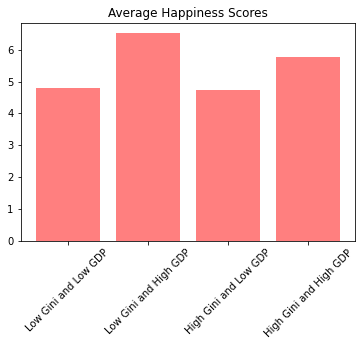

In [53]:
group_1_avg = group_1['Happiness Score'].mean()
group_2_avg = group_2['Happiness Score'].mean()
group_3_avg = group_3['Happiness Score'].mean()
group_4_avg = group_4['Happiness Score'].mean()

values = [group_1_avg, group_2_avg, group_3_avg, group_4_avg]
x_axis = np.arange(len(values))
width = 0

plt.title("Average Happiness Scores")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Low Gini and Low GDP", "Low Gini and High GDP", "High Gini and Low GDP", "High Gini and High GDP"])
plt.xticks(rotation = 45)
plt.xticks(x_axis + width / 2, ("Low Gini and Low GDP", "Low Gini and High GDP", "High Gini and Low GDP", "High Gini and High GDP"))

plt.bar(x_axis, values, color='r', alpha=0.5, align="center")

In [9]:
#df used by Shae and Maria subgroup

sm_df = Final_df.dropna()



In [23]:
#function linear regression
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, color = 'mediumslateblue')
    plt.plot(x,regress_values,"r-", color = "palevioletred")
    return line_eq  
# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="palevioletred")

The r-squared is : 0.75


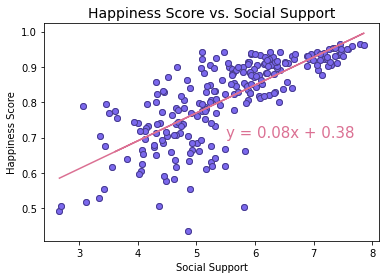

In [24]:
x = sm_df["Happiness Score"]
y = sm_df["Social Support"]
lr = linear_regression(x,y)

annotate(lr, 5.5, .7)

plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Social Support', fontsize= 14)
plt.scatter(x, y, color = 'mediumslateblue', edgecolor = 'darkslateblue')


socialsupportr =  round(st.pearsonr(x, y)[0],2)





In [12]:
# #GDP

# y = sm_df["Happiness Score"]
# x = sm_df["GDP per Capita(ln)"]
# lr = linear_regression(x,y)

# annotate(lr, 9, 3)

# plt.xlabel("GDP per Capita(ln)")
# plt.ylabel("Happiness Score")
# plt.title('Happiness Score vs. GDP per Capita(ln)', fontsize= 14)


The r-squared is : 0.75


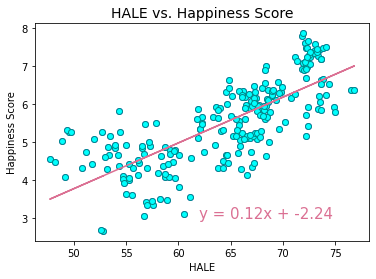

In [25]:
#HALE 

y = sm_df["Happiness Score"]
x = sm_df["HALE"]
lr = linear_regression(x,y)

annotate(lr, 62, 3)

plt.xlabel("HALE")
plt.ylabel("Happiness Score")
plt.title('HALE vs. Happiness Score', fontsize= 14)
plt.scatter(x, y, color = 'cyan', edgecolor = 'darkcyan')


HALEr =  round(st.pearsonr(x, y)[0],2)


The r-squared is : 0.48


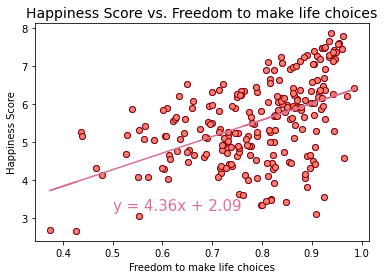

In [26]:
#Freedom to make life choices

y = sm_df["Happiness Score"]
x = sm_df["Freedom to make life choices"]
lr = linear_regression(x,y)

annotate(lr, .5, 3.2)

plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Freedom to make life choices', fontsize= 14)
plt.scatter(x, y, color = 'salmon', edgecolor = 'darkred')

LifeChoicesr =  round(st.pearsonr(x, y)[0],2)


The r-squared is : 0.1


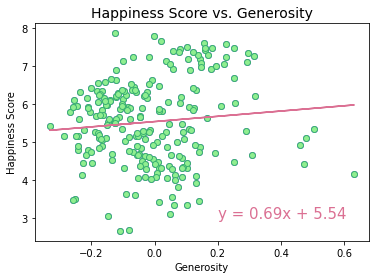

In [27]:
#Generosity

y = sm_df["Happiness Score"]
x = sm_df["Generosity"]
lr = linear_regression(x,y)

annotate(lr, .2, 3)

plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Generosity', fontsize= 14)
plt.scatter(x, y, color = 'lightgreen', edgecolor = 'mediumseagreen')

Generosityr =  round(st.pearsonr(x, y)[0],2)


The r-squared is : -0.48


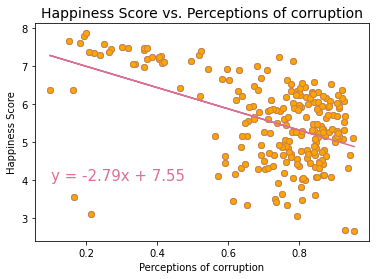

In [28]:
#Perceptions of corruption

y = sm_df["Happiness Score"]
x = sm_df["Perceptions of corruption"]
lr = linear_regression(x,y)

annotate(lr, .1, 4)

plt.xlabel("Perceptions of corruption")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Perceptions of corruption', fontsize= 14)
plt.scatter(x, y, color = 'orange', edgecolor = 'peru')
Corruptionr =  round(st.pearsonr(x, y)[0],2)


The r-squared is : 0.69


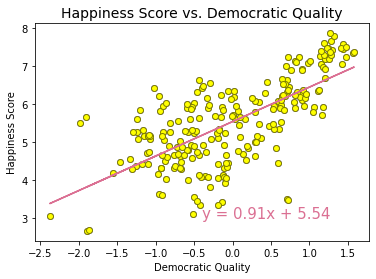

In [29]:
#Democratic Quality

y = sm_df["Happiness Score"]
x = sm_df["Democratic Quality"]
lr = linear_regression(x,y)

annotate(lr, -.4, 3)

plt.xlabel("Democratic Quality")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Democratic Quality', fontsize= 14)
plt.scatter(x, y, color = 'yellow', edgecolor = 'olive')
DemQualityr =  round(st.pearsonr(x, y)[0],2)


In [30]:
#Dictionary of R Values
rsquared_dict = {
                "Social Support" : socialsupportr,
                "HALE" : HALEr,
                "Life Choice Freedom" : LifeChoicesr,
                "Generosity" : Generosityr,
                "Perceptions of Corruption": Corruptionr,
                "Democratic Quality": DemQualityr,
               
                
}

rsquared_df = pd.DataFrame(rsquared_dict, index=["R-Values"])


transposedr = rsquared_df.transpose()



In [31]:
transposedr['R-Values']

Social Support               0.75
HALE                         0.75
Life Choice Freedom          0.48
Generosity                   0.10
Perceptions of Corruption   -0.48
Democratic Quality           0.69
Name: R-Values, dtype: float64

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 9 Text major ticklabel objects>)

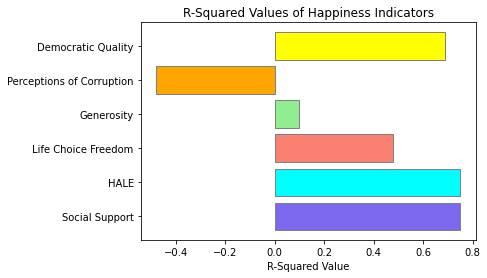

In [32]:
Indicators = ['Social Support','HALE','Life Choice Freedom','Generosity', 'Perceptions of Corruption', 'Democratic Quality']

rvalues = transposedr['R-Values']

x_axis = np.arange(len(rvalues))

# Create a bar chart based upon the above data
plt.barh(x_axis, rvalues, align="center", color=['mediumslateblue', 'cyan', 'salmon', 'lightgreen', 'orange', 'yellow'], edgecolor='gray')

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, Indicators, rotation ="horizontal")

plt.title("R-Squared Values of Happiness Indicators")
plt.xlabel("R-Squared Value")

plt.xticks(rotation=0)





Text(0.5, 1.0, 'Happiness Score vs. Social Support')

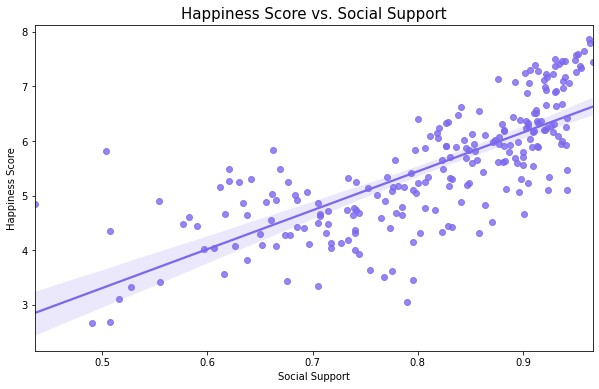

In [33]:
# use the function regplot to make a scatterplot
plt.figure(figsize=(10,6))
sns.regplot(y=sm_df["Happiness Score"], x=sm_df["Social Support"], color='mediumslateblue')
plt.title("Happiness Score vs. Social Support", size=15)

In [34]:
# # use the function regplot to make a scatterplot
# plt.figure(figsize=(10,6))
# sns.regplot(y=sm_df["Happiness Score"], x=sm_df["HALE"], color='cyan')
# plt.title("Happiness Score vs. HALE", size=15)


In [35]:
#dataframe for country name and happiness

happiness_ranking = sm_df.groupby(['Country Name'])['Happiness Score'].mean()

happiness_ranking_df = pd.DataFrame(happiness_ranking)



In [36]:
#add columns for indicators

social_support_ranking = sm_df.groupby(['Country Name'])['Social Support'].mean()

HALE_ranking = sm_df.groupby(['Country Name'])['HALE'].mean()

LCF_ranking = sm_df.groupby(['Country Name'])['Freedom to make life choices'].mean() 

DQ_ranking = sm_df.groupby(['Country Name'])['Democratic Quality'].mean() 


In [37]:
happiness_ranking_df.sort_values(by=['Happiness Score'], inplace=True, ascending=False)
happiness_ranking_df['Social Support'] = social_support_ranking 
happiness_ranking_df['HALE'] = HALE_ranking 
happiness_ranking_df['Life Choice Freedom'] = LCF_ranking 
happiness_ranking_df['Democratic Quality'] = DQ_ranking

happiness_ranking_df =happiness_ranking_df[["Happiness Score", "Social Support", "Life Choice Freedom", "Democratic Quality", "HALE"]]

top_20 = happiness_ranking_df.head(20)




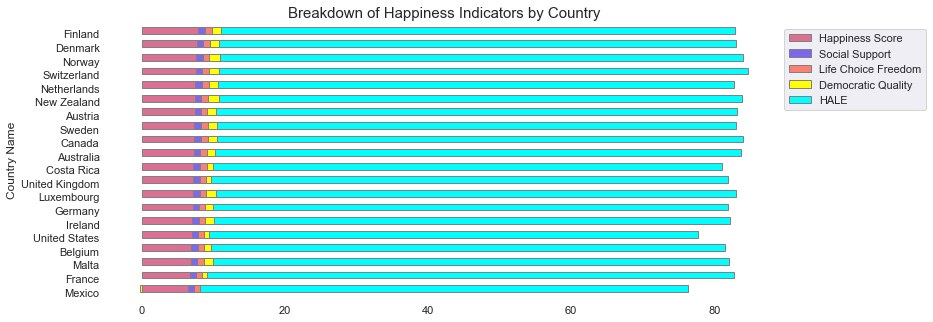

In [331]:
# Create a bar chart based upon the above data


ax = top_20.sort_values("Happiness Score", ascending=True).plot.barh(stacked=True, align='edge', width=.5, color=['palevioletred', 'mediumslateblue', 'salmon', 'yellow', 'cyan'], edgecolor='gray')

ax.set_facecolor("white")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Breakdown of Happiness Indicators by Country", size =15)
plt.rcParams["figure.figsize"] = (12,5)



In [ ]:
#Franklyn/Tristan analysis

In [54]:
# Drop the missing values from HALE and Happiness scores column
cleaned = Final_df.dropna(subset = ["HALE", "Happiness Score"])
hale = cleaned.sort_values(by = "Happiness Score", ascending = False)


hale_2017 = hale.loc[cleaned["year"] == 2017]
hale_2018 = hale.loc[cleaned["year"] == 2018]
hale_2019 = hale.loc[cleaned["year"] == 2019]

In [55]:

# define your functions
def linear_regressions(x_column,y_column):
    x = x_column
    y = y_column
    (slope, intercept, rval, p_value, st) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_column, y_column)
    plt.xlabel(x_column.name)
    plt.ylabel(y_column.name)
    plt.plot(x,regress_values,"r-")
    print(f"The coefficient of correlation {rval}")
    print(f"The p_value is :{p_value}")
    print(f"R Squared is: {rval** 2}")
    plt.annotate(line_eq,(max(x),max(y)),fontsize=15,color="red")

def remove_outliers(df, df_series):
    quartiles = df_series.quantile([.25,.50,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = upperq - lowerq
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    df = df.loc[(df_series > lower_bound) & (df_series < upper_bound) ]
    return df

Text(0.5, 1.0, 'Happiness Comparison across Data Sets')

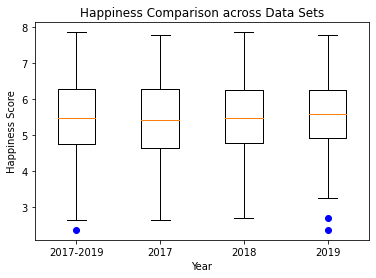

In [56]:
# Create a boxplot to check for potential outliers in the happiness index.
labels = ["2017-2019", "2017", "2018", "2019"]
plt.boxplot([hale["Happiness Score"], hale_2017["Happiness Score"], hale_2018["Happiness Score"], hale_2019["Happiness Score"]], labels = labels, sym = "b")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Comparison across Data Sets")

Text(0.5, 1.0, 'HALE Comparison across Data Sets')

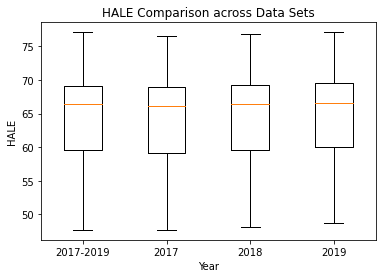

In [57]:
# Create a boxplot to check for potential outliers in the HALE series.
plt.boxplot([hale["HALE"], hale_2017["HALE"], hale_2018["HALE"], hale_2019["HALE"]], labels = labels, sym = "b")
plt.xlabel("Year")
plt.ylabel("HALE")
plt.title("HALE Comparison across Data Sets")

In [58]:
# Remove the outliers so that the data is more accurately reflected.
hale = remove_outliers(hale, hale["Happiness Score"])
hale_2019 = remove_outliers(hale_2019, hale_2019["Happiness Score"])

# All Three Years

The coefficient of correlation 0.7389949501812725
The p_value is :2.646348081184051e-66
R Squared is: 0.5461135363934214


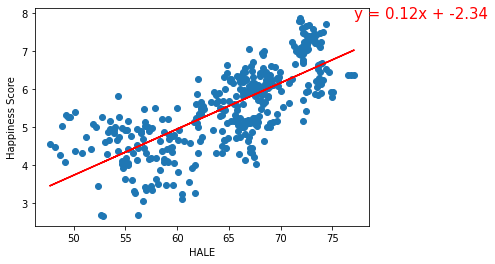

In [59]:
linear_regressions(hale["HALE"], hale["Happiness Score"])

# 2017

The coefficient of correlation 0.7470827003357292
The p_value is :9.691723284494674e-24
R Squared is: 0.558132561140925


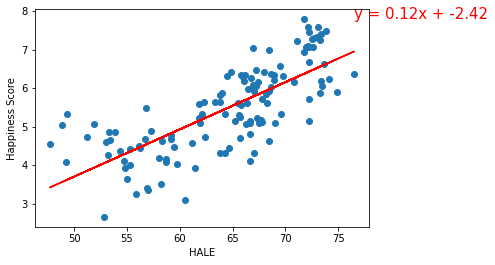

In [60]:
linear_regressions(hale_2017["HALE"], hale_2017["Happiness Score"])


# 2018

The coefficient of correlation 0.734255802951594
The p_value is :1.3408432190703312e-22
R Squared is: 0.53913158416809


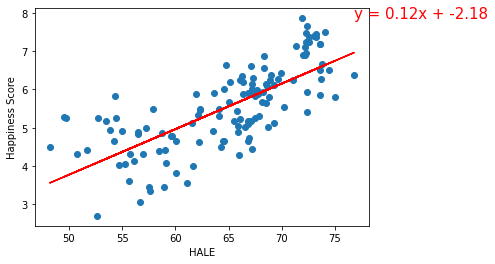

In [61]:
linear_regressions(hale_2018["HALE"], hale_2018["Happiness Score"])


# 2019

The coefficient of correlation 0.7306348820748084
The p_value is :5.922672562271421e-22
R Squared is: 0.5338273309044692


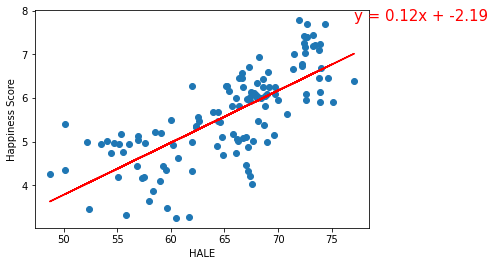

In [62]:
linear_regressions(hale_2019["HALE"], hale_2019["Happiness Score"])

# Bottom and Top Correlation

The coefficient of correlation 0.7306348820748084
The p_value is :5.922672562271421e-22
R Squared is: 0.5338273309044692


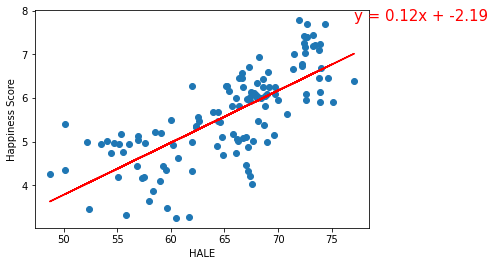

In [63]:
linear_regressions(hale_2019["HALE"], hale_2019["Happiness Score"])

In [64]:
# Split the data set into the TOP 50% and Bottom 50% based off Happiness 
top_hale = hale.iloc[0:189]
bottom_hale = hale.iloc[189:]
x_top = remove_outliers(top_hale, top_hale["HALE"])[["Country Name", "Happiness Score", "HALE"]]
x_bottom = remove_outliers(bottom_hale, bottom_hale["HALE"])[["Country Name", "Happiness Score", "HALE"]]

The coefficient of correlation 0.573947105325513
The p_value is :5.962440299178385e-18
R Squared is: 0.32941527971153545


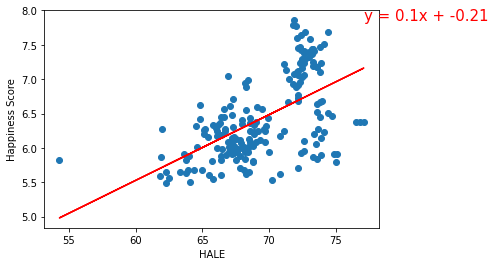

In [65]:
# Top half analysis and regression
linear_regressions(top_hale["HALE"], top_hale["Happiness Score"])

The coefficient of correlation 0.3176734201021653
The p_value is :8.900857419844217e-06
R Squared is: 0.10091640183940681


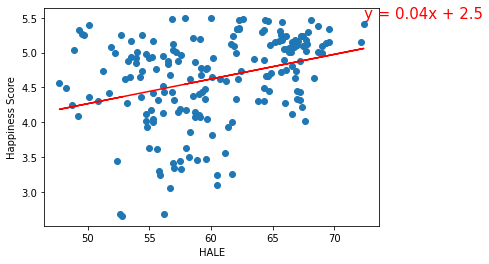

In [66]:
# Bottom half analysis and regression
linear_regressions(bottom_hale["HALE"], bottom_hale["Happiness Score"])

# Graphs for final presentation

In [67]:
cleaned = Final_df.dropna(subset = ["HALE", "Happiness Score"])
hale = cleaned.sort_values(by = "Happiness Score", ascending = False)

In [68]:
# Split the data set into the TOP 50% and Bottom 50% based off Happiness 
top_hale = hale.iloc[0:189]
bottom_hale = hale.iloc[189:]
x_top = remove_outliers(top_hale, top_hale["HALE"])[["Country Name", "Happiness Score", "HALE"]]
x_bottom = remove_outliers(bottom_hale, bottom_hale["HALE"])[["Country Name", "Happiness Score", "HALE"]]
# Remove the outliers so that the data is more accurately reflected.
hale = remove_outliers(hale, hale["Happiness Score"])

The coefficient of correlation 0.7389949501812725
The p_value is :2.646348081184051e-66
R Squared is: 0.5461135363934214


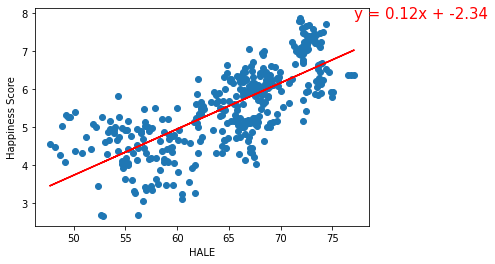

In [69]:
linear_regressions(hale["HALE"], hale["Happiness Score"])

The coefficient of correlation 0.573947105325513
The p_value is :5.962440299178385e-18
R Squared is: 0.32941527971153545


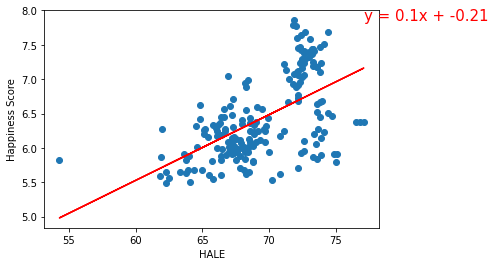

In [70]:
# Top half analysis and regression
linear_regressions(top_hale["HALE"], top_hale["Happiness Score"])

The coefficient of correlation 0.3307432903933923
The p_value is :3.3468994605050136e-06
R Squared is: 0.10939112414024782


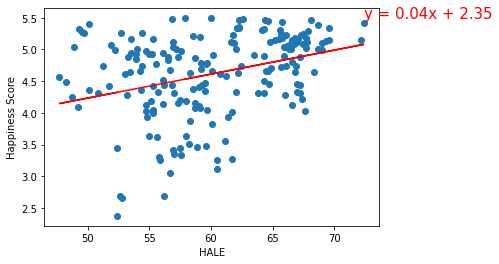

In [71]:
# Bottom half analysis and regression
linear_regressions(bottom_hale["HALE"], bottom_hale["Happiness Score"])